# Question1

先載入所需套件

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

匯入作業要求之鐵達尼號資料

In [3]:
data = pd.read_csv(r"C:\Users\user\Desktop\碩一上\ml & fintech\Titanic Dataset.csv")

## 1.EDA

顯示該資料集資訊與各項參數的類別數量。

In [4]:
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     887 non-null    object 
 1   Sex                      887 non-null    object 
 2   Age                      887 non-null    float64
 3   Siblings/Spouses Aboard  887 non-null    int64  
 4   Parents/Children Aboard  887 non-null    int64  
 5   Fare                     887 non-null    float64
 6   Pclass                   887 non-null    int64  
 7   Survived                 887 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Name                       887
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
Pclass                       3
Survived                     2
dtype: int64

In [5]:
data.reset_index(drop = True ,inplace = True)
data

,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass,Survived
0,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,3,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,1
2,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,3,1
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,1
4,Mr. William Henry Allen,male,35.0,0,0,8.0500,3,0
...,...,...,...,...,...,...,...,...
882,Rev. Juozas Montvila,male,27.0,0,0,13.0000,2,0
883,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,1,1
884,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,3,0
885,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,1,1


使用seaborn套件繪製出生存與否於不同性別下的數量長條圖，與性別倖存的比率，可看出女性存活率較男性高出相當多。

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Sex,Survived
0,female,0.742
1,male,0.190


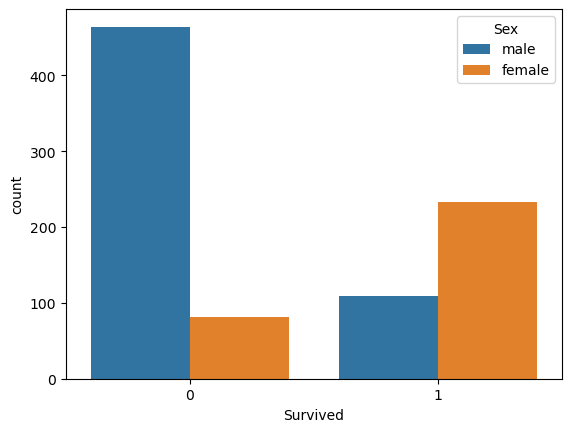

In [6]:
sns.countplot(data['Survived'],hue = data['Sex'])
display(data[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().round(3))

繪製出乘客生存與否於不同等級艙位下的數量長條圖，與不同等級艙位下倖存的比率，可看出乘客於越高等級艙位存活率較低等級艙高出相當多。

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.244


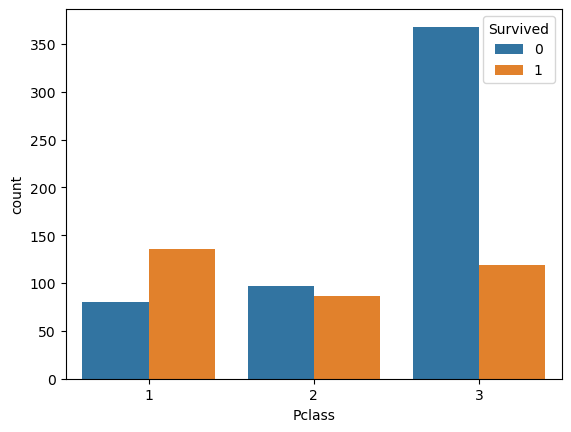

In [7]:
sns.countplot(data['Pclass'],hue = data['Survived'])
display(data[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().round(3))

繪製出乘客生存與否在不同年齡層上的數量直方圖，可發現未存活乘客相較於存活之乘客於20~30歲有相當高的比例。

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


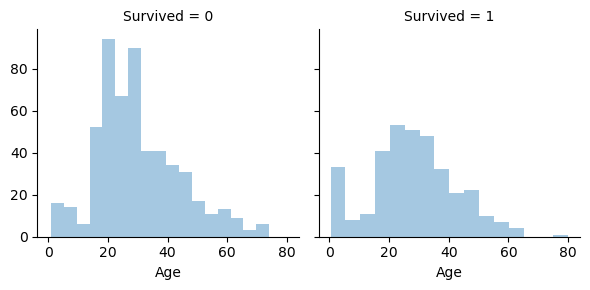

In [8]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot,'Age',kde = False)

繪製出乘客生存與否在不同票價上的數量直方圖，可以看出購買低票價的乘客死亡數量相當的高。

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


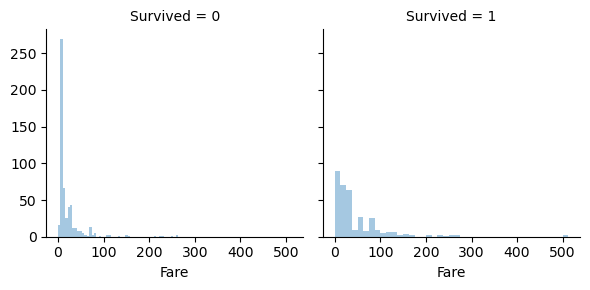

In [9]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot,'Fare',kde = False)

當乘客有(兄弟姊妹/配偶)或(父母/小孩)一起上船時存活率，可看見兄弟姊妹與配偶在0到3人一起上船時，存活率先生後降，父母與小孩在0到4，存活率隨著人數增加而提高。

In [10]:
display(data[['Siblings/Spouses Aboard','Survived']].groupby(['Siblings/Spouses Aboard'],as_index = False).mean().round(3))
display(data[['Parents/Children Aboard','Survived']].groupby(['Parents/Children Aboard'],as_index = False).mean().round(3))

,Siblings/Spouses Aboard,Survived
0,0,0.348
1,1,0.536
2,2,0.464
3,3,0.250
4,4,0.167
5,5,0.000
6,8,0.000


,Parents/Children Aboard,Survived
0,0,0.346
1,1,0.551
2,2,0.500
3,3,0.600
4,4,0.000
5,5,0.200
6,6,0.000


衡量各參數相關係數之熱力圖。

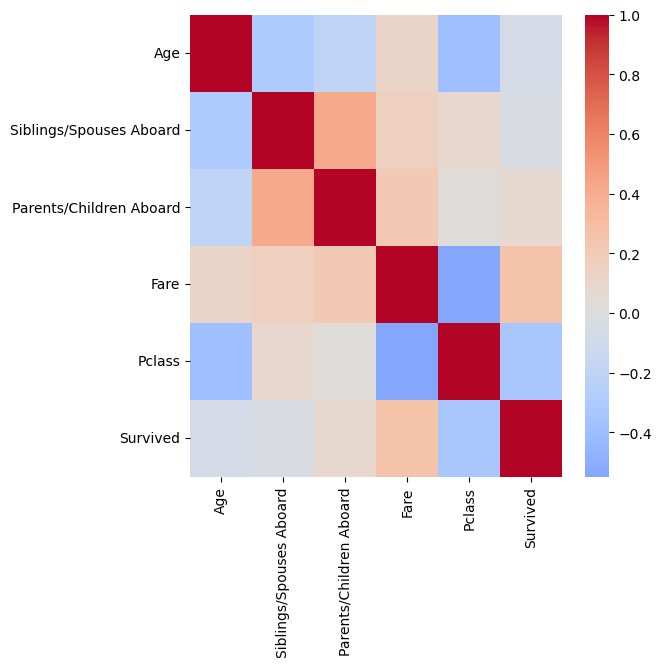

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot = False, center=0.0, cmap='coolwarm'); 
plt.show()

## 2.Pre-process the continuous and discrete data

首先想對乘客姓名進行處裡並分類，首先我們先將各位乘客名子的稱謂整理出來。

In [12]:
data['title1'] = data['Name'].str.split(expand = True)[0]
data['title1'] = data['title1'].str.split('.',expand = True)[0]
data['title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the', 'Jonkheer'],
      dtype=object)

各姓名稱謂於性別的分布。

In [13]:
pd.crosstab(data['title1'],data['Sex']).T.style.background_gradient(cmap='PuBu')

title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,513,0,0,6,1,0


各姓名稱謂存活與否在數量上的的分布。

In [14]:
pd.crosstab(data['title1'],data['Survived']).T.style.background_gradient(cmap='PuBu')

title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,432,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


各稱謂平均年齡。

In [15]:
data.groupby(['title1'])['Age'].mean()

title1
Capt        70.000000
Col         58.000000
Don         40.000000
Dr          42.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.641750
Miss        21.994505
Mlle        24.000000
Mme         24.000000
Mr          31.839181
Mrs         35.768000
Ms          28.000000
Rev         43.166667
Sir         49.000000
the         33.000000
Name: Age, dtype: float64

我們將性別年齡相似的稱謂皆歸類於四大類 ('Mr', 'Mrs', 'Miss', 'Master') 並存於data ['title2']

In [16]:
data['title2'] = data['title1'].replace(['Capt','Col','Don','Dona','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir','the'],[    
'Mr','Mr','Mr','Mrs','Mr','Mr','Mrs','Mr','Miss','Miss','Miss','Mr','Mr','Mrs'])
data['title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

票價的缺失值以票價之中位數補進。

In [17]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

將票價分為4,5,6種價格區間，之後分別測試預測效果，下圖也能看到隨著票價區間增加，存活率跟著提高。

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

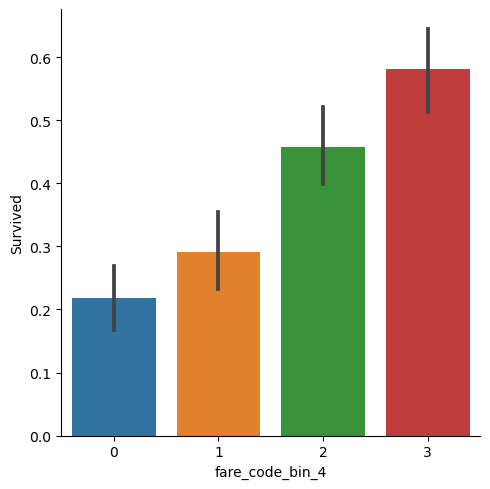

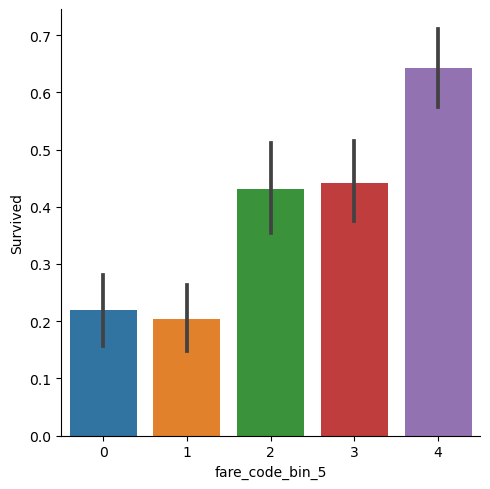

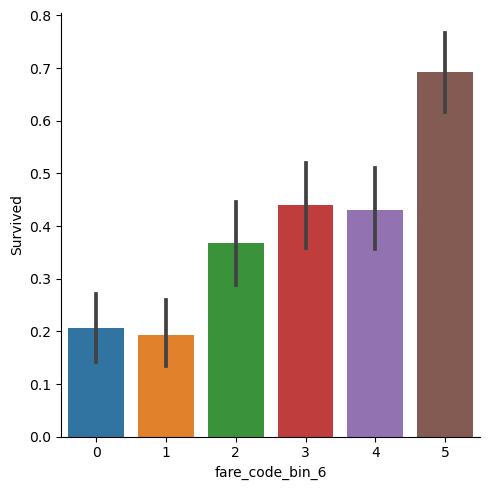

In [18]:
data['farebin_4'] = pd.qcut(data['Fare'],4)
data['farebin_5'] = pd.qcut(data['Fare'],5)
data['farebin_6'] = pd.qcut(data['Fare'],6)
label = LabelEncoder()
data['fare_code_bin_4'] = label.fit_transform(data['farebin_4'])
data['fare_code_bin_5'] = label.fit_transform(data['farebin_5'])
data['fare_code_bin_6'] = label.fit_transform(data['farebin_6'])

g1 = sns.factorplot(x = 'fare_code_bin_4', y = 'Survived', data = data, kind = 'bar')
g2 = sns.factorplot(x = 'fare_code_bin_5', y = 'Survived', data = data, kind = 'bar')
g3 = sns.factorplot(x = 'fare_code_bin_6', y = 'Survived', data = data, kind = 'bar')


In [19]:
data['title2'] = data['title2'].astype('category').cat.codes.astype('str')
data['Sex'] = data['Sex'].astype('str')
data['Pclass'] = data['Pclass'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Name                     887 non-null    object  
 1   Sex                      887 non-null    object  
 2   Age                      887 non-null    float64 
 3   Siblings/Spouses Aboard  887 non-null    int64   
 4   Parents/Children Aboard  887 non-null    int64   
 5   Fare                     887 non-null    float64 
 6   Pclass                   887 non-null    object  
 7   Survived                 887 non-null    int64   
 8   title1                   887 non-null    object  
 9   title2                   887 non-null    object  
 10  farebin_4                887 non-null    category
 11  farebin_5                887 non-null    category
 12  farebin_6                887 non-null    category
 13  fare_code_bin_4          887 non-null    int32   
 14  fare_code_

重新整理過後資料。

In [20]:
data.head()

,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass,Survived,title1,title2,farebin_4,farebin_5,farebin_6,fare_code_bin_4,fare_code_bin_5,fare_code_bin_6
0,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,3,0,Mr,2,"(-0.001, 7.925]","(-0.001, 7.858]","(-0.001, 7.775]",0,0,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,1,Mrs,3,"(31.138, 512.329]","(39.688, 512.329]","(52.554, 512.329]",3,4,5
2,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,3,1,Miss,1,"(-0.001, 7.925]","(7.858, 10.5]","(7.775, 8.662]",0,1,1
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,1,Mrs,3,"(31.138, 512.329]","(39.688, 512.329]","(52.554, 512.329]",3,4,5
4,Mr. William Henry Allen,male,35.0,0,0,8.0500,3,0,Mr,2,"(7.925, 14.454]","(7.858, 10.5]","(7.775, 8.662]",1,1,1


## 3.Build the logistic regression model

建立X特徵值組合以建構模型(於三種不同票價區間)。

In [41]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['Sex'] = enc.fit_transform(data['Sex'])

In [42]:
X_4 = data.drop(labels=['Name','title1','Pclass','farebin_4','farebin_5','farebin_6','Survived','fare_code_bin_5','fare_code_bin_6','Fare'],axis = 1)
X_5 = data.drop(labels=['Name','title1','farebin_4','Pclass','farebin_5','farebin_6','Survived','fare_code_bin_4','fare_code_bin_6','Fare'],axis = 1)
X_6 = data.drop(labels=['Name','title1','farebin_4','Pclass','farebin_5','farebin_6','Survived','fare_code_bin_4','fare_code_bin_5','Fare'],axis = 1)

真實存活資料設為y。

In [43]:
y = data['Survived']

使用train_test_split將資料拆分為75%訓練集資料與25%測試集資料，並使用sklearn的LogisticRegression、BaggingClassifier、GradientBoostingClassifier、RandomForestClassifier建構模型。

In [44]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y, test_size=0.25, random_state=1)
clf_4 = LogisticRegression(random_state=0).fit(X_train_4,y_train_4)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_4 = scaler.fit_transform(X_train_4)
X_test_4 = scaler.transform(X_test_4)

## 4.predict the data and the accuracy

LogisticRegression，accuracy score大約為79%(正確預測機率)。

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

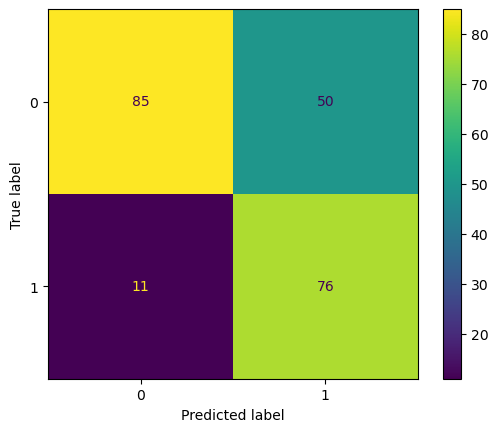

In [80]:
y_predict_4 = clf_4.predict(X_test_4)
cm = confusion_matrix(y_test_4,y_predict_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_4.classes_)
plt.figure(figsize=(12,8))
disp.plot()
plt.show()

In [81]:
accuracy_score(y_test_4,y_predict_4)

0.7252252252252253

BaggingClassifier，accuracy score大約為81%(正確預測機率)。

In [82]:
from sklearn.ensemble import BaggingClassifier
clf_4_bag = BaggingClassifier().fit(X_train_4,y_train_4)

In [83]:
clf_4_bag.score(X_test_4, y_test_4)

0.8108108108108109

GradientBoostingClassifier，accuracy score大約為82.4%(正確預測機率)。

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
clf_4_boo = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train_4,y_train_4)
clf_4_boo.score(X_test_4, y_test_4)

0.8243243243243243

RandomForestClassifier，accuracy score大約為82.4%(正確預測機率)。

In [98]:
from sklearn.ensemble import RandomForestClassifier
clf_4_ran = RandomForestClassifier(max_depth=5, random_state=0 ).fit(X_train_4,y_train_4)
clf_4_ran.score(X_test_4, y_test_4)

0.8243243243243243